# MNIST 데이터셋 학습 (to do)
MNIST 데이터셋은0~9까지 총 10개의 label로 이루어진 이미지 분류를 위한 사이즈의 손글씨 데이터셋이다.  
각각의 레이블마다 28×28 크기 이미지인 60,000개의 training 데이터셋, 10,000개의 test 데이터셋이 존재하고, 결과적으로 총 70,000개의 28×28 크기의 이미지로 데이터셋이 구성되어 있다.

In [1]:
import tensorflow as tf
from tensorflow.compat.v1 import ConfigProto, Session
from tensorflow.compat.v1.keras.backend import set_session
config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction=0.3
session = Session(config=config)
set_session(session)
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

2022-06-30 22:39:53.335634: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2022-06-30 22:39:56.195489: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-30 22:39:56.197238: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-06-30 22:39:56.205900: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-06-30 22:39:56.545362: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:17:00.0 name: NVIDIA GeForce RTX 2080 computeCapability: 7.5
coreClock: 1.71GHz coreCount: 46 

In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4470624465371944160
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 2511018393
locality {
  bus_id: 1
  links {
  }
}
incarnation: 15377269440219888163
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2080, pci bus id: 0000:17:00.0, compute capability: 7.5"
, name: "/device:GPU:1"
device_type: "GPU"
memory_limit: 2508501811
locality {
  bus_id: 1
  links {
  }
}
incarnation: 2191137900247687830
physical_device_desc: "device: 1, name: NVIDIA GeForce RTX 2080, pci bus id: 0000:b3:00.0, compute capability: 7.5"
]


2022-06-30 22:39:58.272585: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-06-30 22:39:58.273740: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:17:00.0 name: NVIDIA GeForce RTX 2080 computeCapability: 7.5
coreClock: 1.71GHz coreCount: 46 deviceMemorySize: 7.79GiB deviceMemoryBandwidth: 417.23GiB/s
2022-06-30 22:39:58.274720: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 1 with properties: 
pciBusID: 0000:b3:00.0 name: NVIDIA GeForce RTX 2080 computeCapability: 7.5
coreClock: 1.71GHz coreCount: 46 deviceMemorySize: 7.79GiB deviceMemoryBandwidth: 417.23GiB/s
2022-06-30 22:39:58.274791: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2022-06-30 22:39:58.274863: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.1

In [3]:
from tensorflow import keras
import tensorflow.keras.utils as utils
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
from tensorflow.keras import backend
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from tensorflow.keras.layers import Flatten, BatchNormalization, Dropout, ReLU
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

In [5]:
from tensorflow.keras.optimizers import Adam

In [6]:
from tensorflow.keras import backend
backend.image_data_format()

'channels_last'

## (1) 데이터셋

In [14]:
(X_train, Y_train),(X_test, Y_test) = datasets.mnist.load_data()
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [15]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

Y_train = utils.to_categorical(Y_train)
Y_test = utils.to_categorical(Y_test)

print(X_train.shape, Y_train.shape)

n_in = X_train.shape[1:]
n_out = Y_train.shape[-1]

(60000, 28, 28, 1) (60000, 10)


## (2) 모델링 및 평가

In [21]:
def CNN_HS(n_in, n_out):
    model = Sequential()
    model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu", padding='Same', input_shape=(28,28,1)))
    model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu", padding='Same'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu", padding='Same'))
    model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu", padding='Same'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(256, activation="relu"))
    model.add(Dense(10,activation="softmax"))
    return model

In [22]:
model = CNN_HS(n_in, n_out)
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
batch_normalization_18 (Batc (None, 14, 14, 64)        256       
_________________________________________________________________
dropout_29 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 14, 14, 128)      

## Random-State 조정

In [23]:
i = 2
tf.random.set_seed(i)
print('Seed_Number :', i)
config = ConfigProto()(X_train, Y_train),(X_test, Y_test) = datasets.mnist.load_data()
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

model = CNN_HS(n_in, n_out)
adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, decay=1e-3, epsilon=False, amsgrad=False)    
model.compile(loss="categorical_crossentropy", optimizer=adam, metrics=["accuracy"])

datagen = ImageDataGenerator(
      featurewise_center=False,  
      samplewise_center=False,  
      featurewise_std_normalization=False, 
      samplewise_std_normalization=False,  
      zca_whitening=False, 
      rotation_range=15,  
      zoom_range = 0.05, 
      width_shift_range=0.2,  
      height_shift_range=0.2, 
      horizontal_flip=False, 
      vertical_flip=False)

train_gen = datagen.flow(X_train, Y_train, batch_size=64)
test_gen = datagen.flow(X_test, Y_test, batch_size=64)

epochs = 100
batch_size = 64
train_steps = X_train.shape[0] // batch_size
valid_steps = X_test.shape[0] // batch_size

es = keras.callbacks.EarlyStopping(
      monitor="val_accuracy", 
      patience=10, 
      verbose=1,
      mode="max", 
      restore_best_weights=True, 
  )

rp = keras.callbacks.ReduceLROnPlateau(
      monitor="val_accuracy",
      factor=0.2,
      patience=5,
      verbose=1,
      mode="max",
      min_lr=0.00001,
  )

history = model.fit(train_gen, 
                            epochs = epochs, 
                            steps_per_epoch = train_steps,
                            validation_data = test_gen,
                            validation_steps = valid_steps, 
                            callbacks=[es, rp])

loss_and_accuracy = model.evaluate(X_test, Y_test, batch_size=64)

print('loss : %.4f, accruracy : %.4f'%(loss_and_accuracy[0],loss_and_accuracy[1]))

Seed_Number : 2


2022-06-30 23:23:53.564524: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-06-30 23:23:53.566051: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:17:00.0 name: NVIDIA GeForce RTX 2080 computeCapability: 7.5
coreClock: 1.71GHz coreCount: 46 deviceMemorySize: 7.79GiB deviceMemoryBandwidth: 417.23GiB/s
2022-06-30 23:23:53.567518: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 1 with properties: 
pciBusID: 0000:b3:00.0 name: NVIDIA GeForce RTX 2080 computeCapability: 7.5
coreClock: 1.71GHz coreCount: 46 deviceMemorySize: 7.79GiB deviceMemoryBandwidth: 417.23GiB/s
2022-06-30 23:23:53.567601: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2022-06-30 23:23:53.567656: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.1

Epoch 1/100
937/937 [==============================] - 31s 33ms/step - loss: 0.5295 - accuracy: 0.8290 - val_loss: 0.0663 - val_accuracy: 0.9792
Epoch 2/100
937/937 [==============================] - 31s 33ms/step - loss: 0.0853 - accuracy: 0.9740 - val_loss: 0.0444 - val_accuracy: 0.9859
Epoch 3/100
937/937 [==============================] - 32s 34ms/step - loss: 0.0619 - accuracy: 0.9807 - val_loss: 0.0353 - val_accuracy: 0.9885
Epoch 4/100
937/937 [==============================] - 31s 33ms/step - loss: 0.0478 - accuracy: 0.9856 - val_loss: 0.0412 - val_accuracy: 0.9870
Epoch 5/100
937/937 [==============================] - 30s 32ms/step - loss: 0.0416 - accuracy: 0.9866 - val_loss: 0.0238 - val_accuracy: 0.9929
Epoch 6/100
937/937 [==============================] - 30s 32ms/step - loss: 0.0414 - accuracy: 0.9875 - val_loss: 0.0245 - val_accuracy: 0.9916
Epoch 7/100
937/937 [==============================] - 31s 33ms/step - loss: 0.0366 - accuracy: 0.9887 - val_loss: 0.0224 - val_ac

## (3) 모델 성능

In [24]:
print('loss : %.4f, accruracy : %.4f'%(loss_and_accuracy[0],loss_and_accuracy[1]))

loss : 0.0108, accruracy : 0.9970


## (4) 모델 저장 및 predict_DataFrame 생성

In [25]:
model.save("CNN_997.h5")

In [34]:
Y_real = []
for i in Y_test:
    Y_real.append(i.argmax())

In [36]:
Y_pred = []
for j in model.predict(X_test):
    Y_pred.append(j.argmax())

In [40]:
!pip install pandas

  Using cached pandas-1.4.3-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.7 MB)
  Using cached pytz-2022.1-py2.py3-none-any.whl (503 kB)


In [41]:
import pandas as pd

In [42]:
final_df = pd.DataFrame(columns = ['Real', 'Predict'])

final_df['Real'] = Y_real
final_df['Predict'] = Y_pred

In [50]:
final_df

,Real,Predict,Same
0,7,7,False
1,2,2,False
2,1,1,False
3,0,0,False
4,4,4,False
...,...,...,...
9995,2,2,False
9996,3,3,False
9997,4,4,False
9998,5,5,False


In [52]:
## 실제값과 예측값과 다른 인덱스를 만들기 위함
final_df['Same'] = final_df['Real'] == final_df['Predict']

In [58]:
final_df.to_csv('MNIST_df.csv', index=False)

In [59]:
final_df

,Real,Predict,Same
0,7,7,True
1,2,2,True
2,1,1,True
3,0,0,True
4,4,4,True
...,...,...,...
9995,2,2,True
9996,3,3,True
9997,4,4,True
9998,5,5,True


## (5) 모델 성능 평가

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

In [77]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.figure(figsize=(15,15))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize = 40)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label', fontsize = 20)
    plt.xlabel('Predicted label', fontsize = 20)

In [78]:
confusion_maritx = confusion_matrix(Y_real, Y_pred)

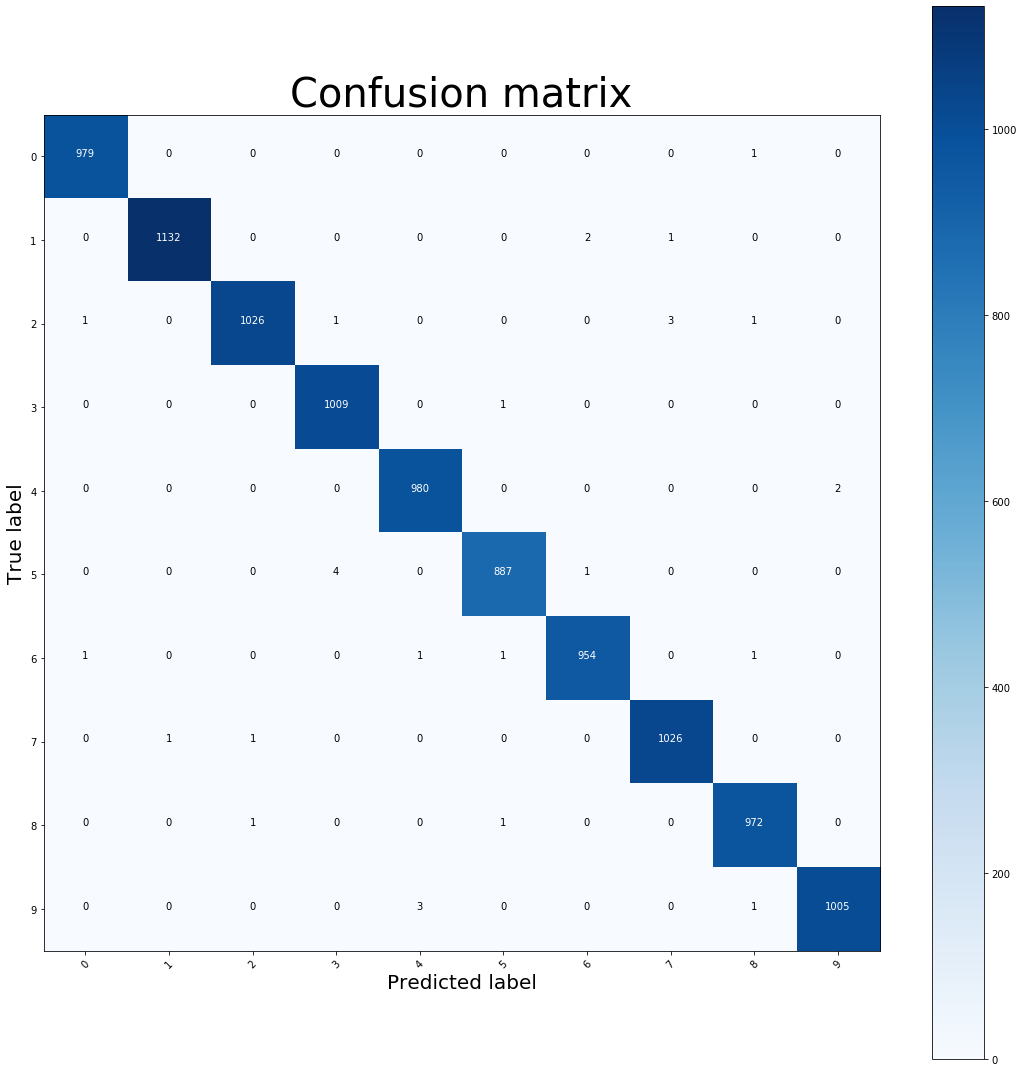

In [79]:
plot_confusion_matrix(confusion_maritx, classes = range(10))

## (6) 모델 사용하기

모델 평가 후, 분류 오류가 난 사례들을 확인해보고, 모델과 데이터셋에 대한 평가 및 분석해볼 것

In [94]:
error_list = list(final_df[final_df['Same'] == False].index)

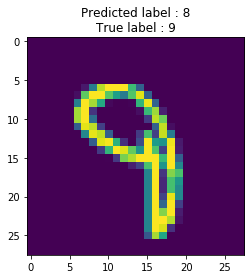

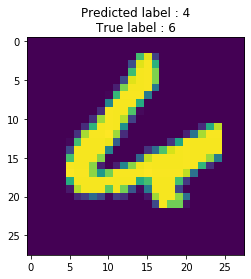

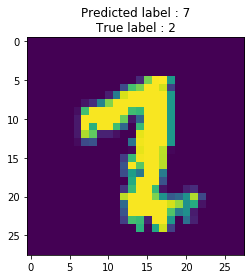

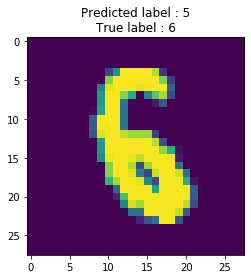

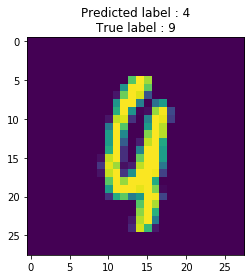

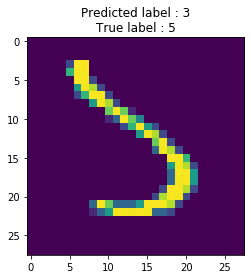

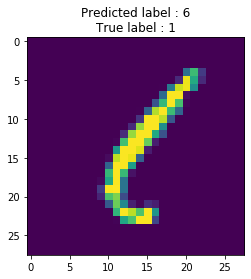

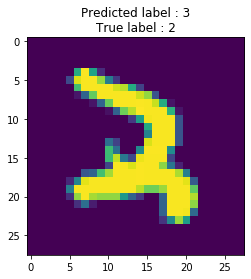

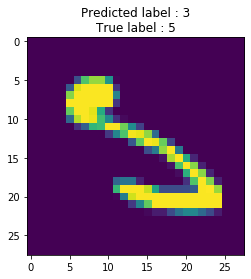

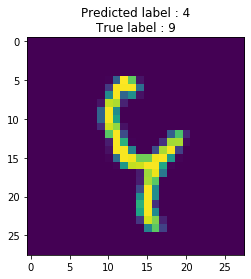

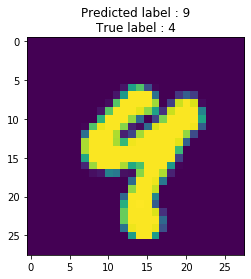

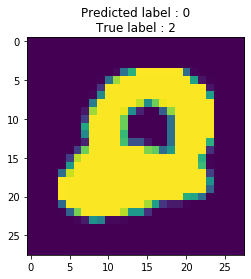

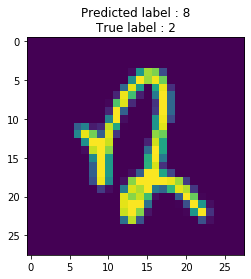

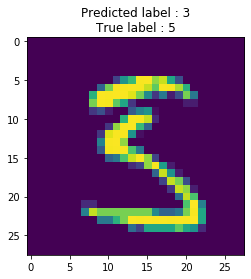

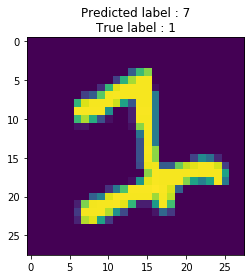

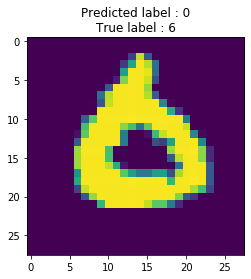

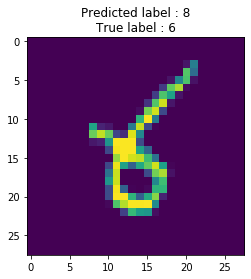

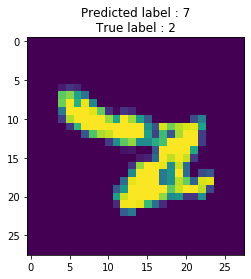

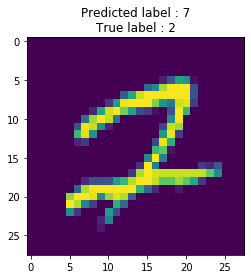

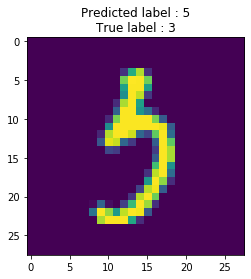

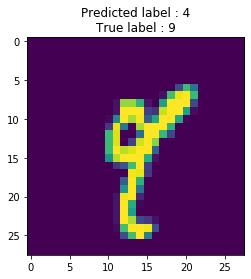

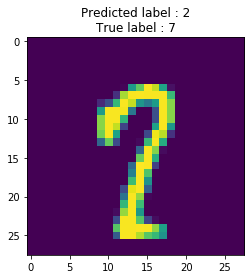

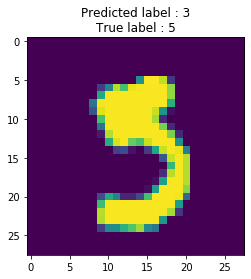

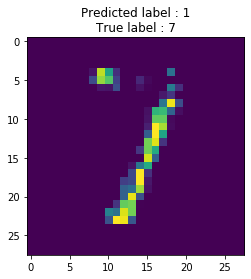

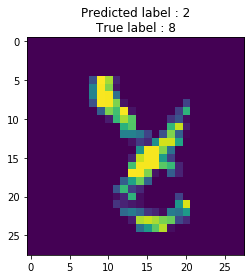

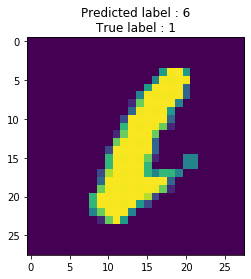

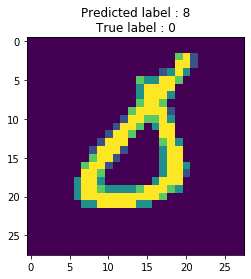

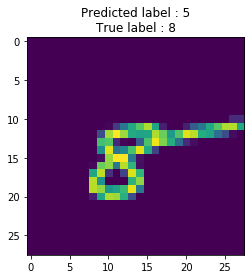

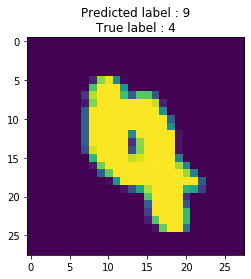

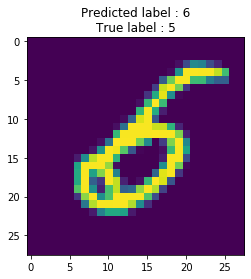

In [119]:
for i in error_list:
    plt.imshow((X_test[i]).reshape((28,28)))
    plt.title("Predicted label : {}\nTrue label : {}".format(Y_pred[i],Y_real[i]))
    plt.show()